# Generate random points for 2 circles

We're generating based on radius and a noise level, which gives a similar distribution to the task.

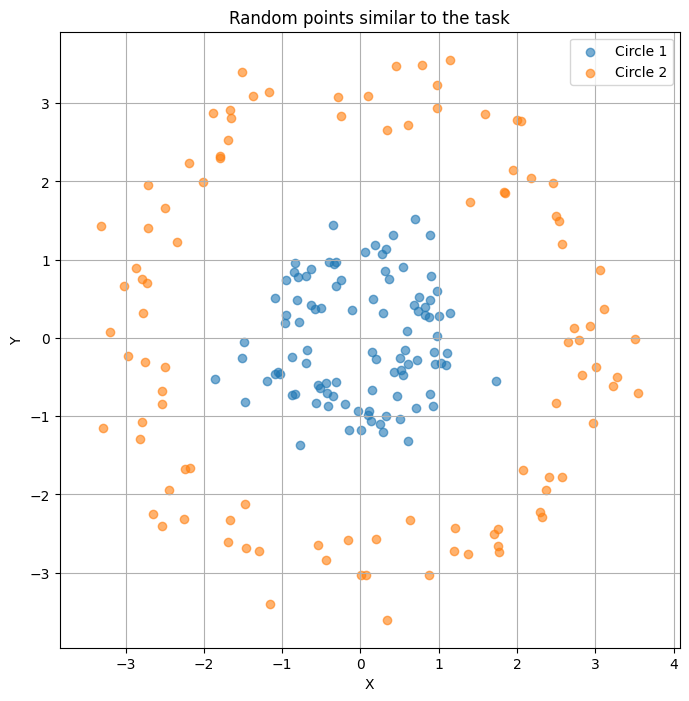

In [48]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 100
radius1 = 1
radius2 = 3
noise_level = 0.3

angles = np.linspace(0, 2 * np.pi, num_points)

circle1_x = radius1 * np.cos(angles) + np.random.normal(0, noise_level, num_points)
circle1_y = radius1 * np.sin(angles) + np.random.normal(0, noise_level, num_points)

angles = np.linspace(0, 2 * np.pi, num_points)

circle2_x = radius2 * np.cos(angles) + np.random.normal(0, noise_level, num_points)
circle2_y = radius2 * np.sin(angles) + np.random.normal(0, noise_level, num_points)

plt.figure(figsize=(8, 8))
plt.scatter(circle1_x, circle1_y, label='Circle 1', alpha=0.6)
plt.scatter(circle2_x, circle2_y, label='Circle 2', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random points similar to the task')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.savefig('random_points.png')
plt.show()


# Transform the points by squaring their coordinates

We chose squaring as it very simple (and as the task asked to map it to another 2D space), but there are many ways to transform the data to make it linearly separable.

We can see, just by looking at the plot, that the transformed points are linearly separable, as the decision boundary will be a simple line.

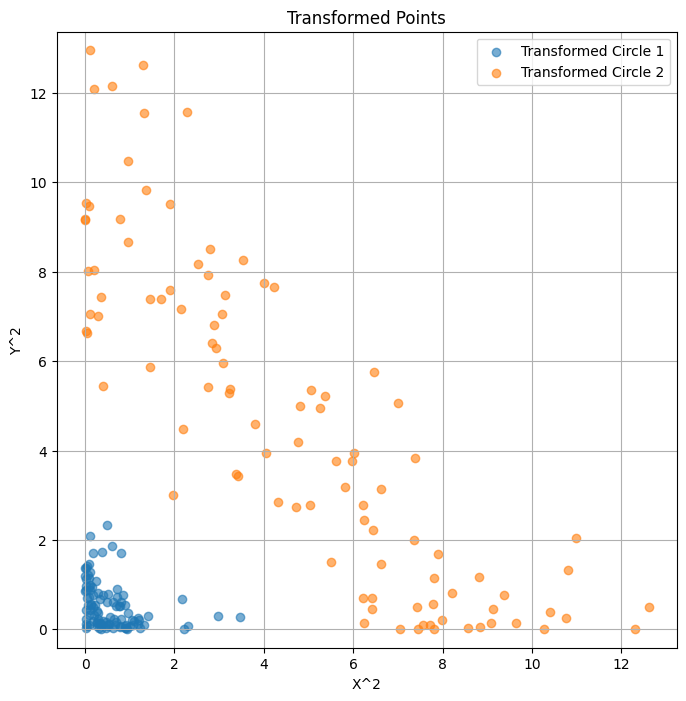

In [49]:
transformed_circle1_x = np.square(circle1_x)
transformed_circle1_y = np.square(circle1_y)
transformed_circle2_x = np.square(circle2_x)
transformed_circle2_y = np.square(circle2_y)

plt.figure(figsize=(8, 8))
plt.scatter(transformed_circle1_x, transformed_circle1_y, label='Transformed Circle 1', alpha=0.6)
plt.scatter(transformed_circle2_x, transformed_circle2_y, label='Transformed Circle 2', alpha=0.6)
plt.xlabel('X^2')
plt.ylabel('Y^2')
plt.title('Transformed Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.savefig('transformed_points.png')
plt.show()


# Train a single layer perceptron

We're using the Perceptron class from sklearn, as it is a simple and effective.

It's not always perfect (it should have an angle of -45 degrees), but it's close to the task.

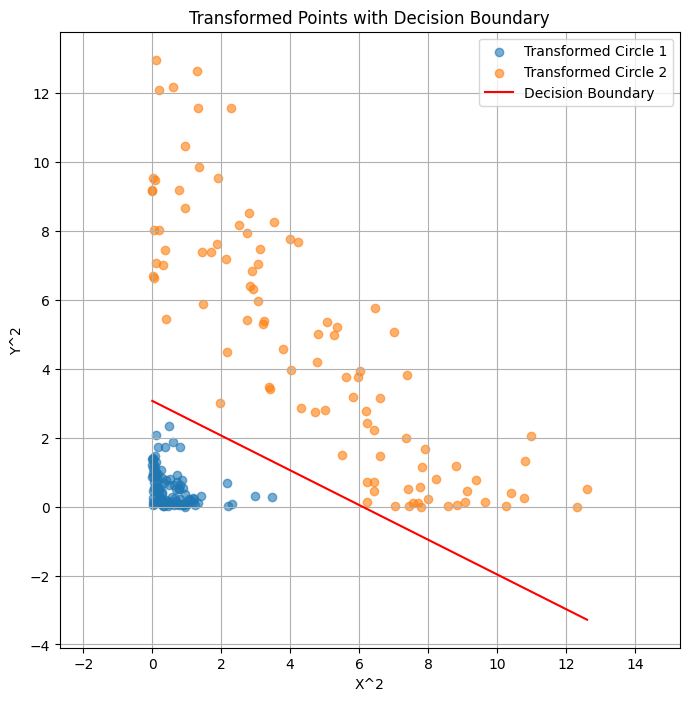

In [50]:
from sklearn.linear_model import Perceptron

X = np.vstack((np.column_stack((transformed_circle1_x, transformed_circle1_y)),
               np.column_stack((transformed_circle2_x, transformed_circle2_y))))
y = np.hstack((np.zeros(num_points), np.ones(num_points)))

single_layer_perceptron = Perceptron(max_iter=1000, tol=1e-3)
single_layer_perceptron.fit(X, y)

coef = single_layer_perceptron.coef_[0]
intercept = single_layer_perceptron.intercept_

plt.figure(figsize=(8, 8))
plt.scatter(transformed_circle1_x, transformed_circle1_y, label='Transformed Circle 1', alpha=0.6)
plt.scatter(transformed_circle2_x, transformed_circle2_y, label='Transformed Circle 2', alpha=0.6)

x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
decision_boundary = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, decision_boundary, label='Decision Boundary', color='red')

plt.xlabel('X^2')
plt.ylabel('Y^2')
plt.title('Transformed Points with Decision Boundary')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.savefig('transformed_points_with_decision_boundary.png')
plt.show()


# Generate 20 random points and transform then classify them

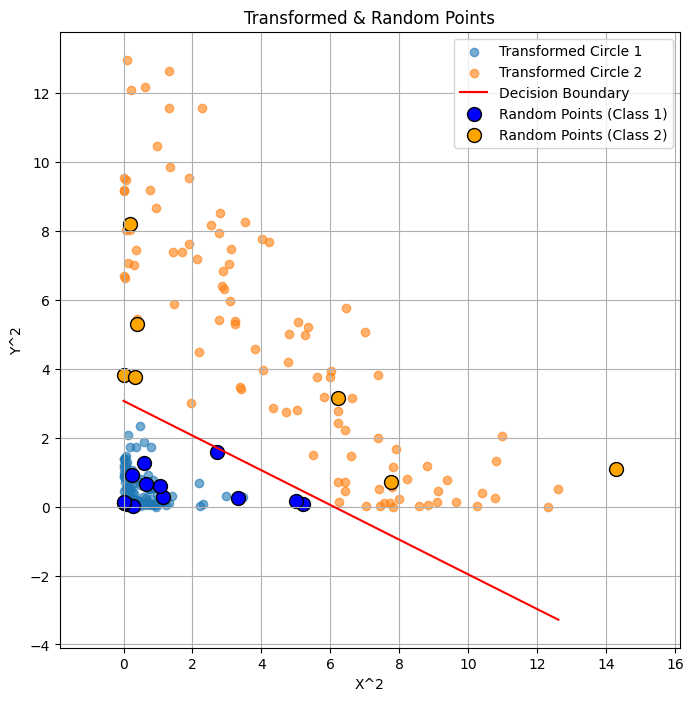

In [51]:
random_points = np.random.normal(0, 1.4, (20, 2))

transformed_random_points = np.column_stack((random_points[:, 0]**2, random_points[:, 1]**2))

predicted_classes = single_layer_perceptron.predict(transformed_random_points)

plt.figure(figsize=(8, 8))
plt.scatter(transformed_circle1_x, transformed_circle1_y, label='Transformed Circle 1', alpha=0.6)
plt.scatter(transformed_circle2_x, transformed_circle2_y, label='Transformed Circle 2', alpha=0.6)

x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
decision_boundary = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, decision_boundary, label='Decision Boundary', color='red')

colors = ['blue' if cls == 0 else 'orange' for cls in predicted_classes]
for point, color in zip(transformed_random_points, colors):
    plt.scatter(point[0], point[1], color=color, edgecolor='black', s=100)
    
plt.scatter([], [], color='blue', label='Random Points (Class 1)', edgecolor='black', s=100)
plt.scatter([], [], color='orange', label='Random Points (Class 2)', edgecolor='black', s=100)

plt.xlabel('X^2')
plt.ylabel('Y^2')
plt.title('Transformed & Random Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.savefig('transformed_random_data_points.png')
plt.show()

# Plot the original points with colors based on classification

The "elliptical" nature of some of the new blue points is due to the fact that the decision boundary is not a -45 degree line.

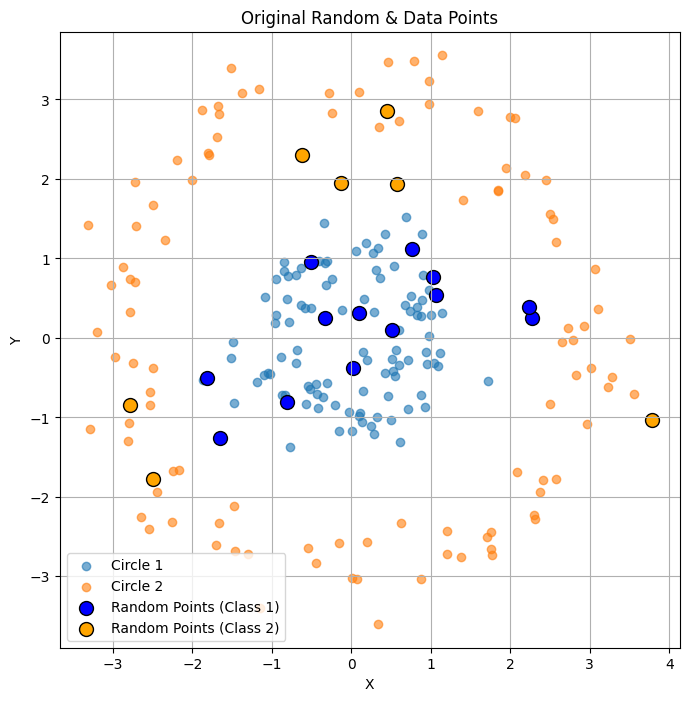

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(circle1_x, circle1_y, label='Circle 1', alpha=0.6)
plt.scatter(circle2_x, circle2_y, label='Circle 2', alpha=0.6)

colors = ['blue' if cls == 0 else 'orange' for cls in predicted_classes]
for point, color in zip(random_points, colors):
    plt.scatter(point[0], point[1], color=color, edgecolor='black', s=100)

plt.scatter([], [], color='blue', label='Random Points (Class 1)', edgecolor='black', s=100)
plt.scatter([], [], color='orange', label='Random Points (Class 2)', edgecolor='black', s=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Random & Data Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.savefig('original_random_data_points.png')
plt.show()